In [1]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
%matplotlib inline

In [2]:
pwd

'/home/davidpqc1231'

In [3]:
mb_size = 64
transform = transforms.ToTensor()
traindata = torchvision.datasets.MNIST('/home/davidpqc1231', download=True, transform=transform, train = True)
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=mb_size)

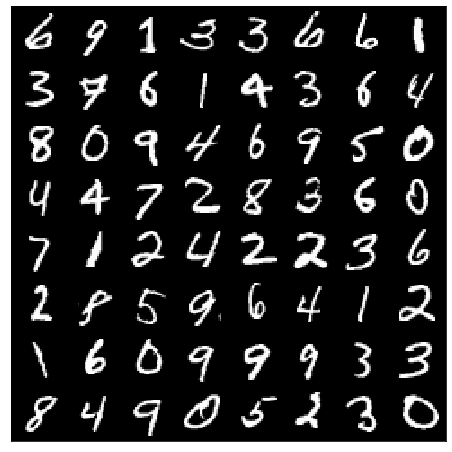

torch.Size([64, 1, 28, 28])


In [4]:
dataiter = iter(trainloader)
imgs, labels = dataiter.next()

def imshow(imgs):
    """ Visualizing images """
    # make_grid will make a grid out of images
    imgs = torchvision.utils.make_grid(imgs)
    
    # transfoming tensors to numpy arrays
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

print(imgs.size())

In [5]:
h_dim = 128    # number of hidden neurons in our hidden layer
Z_dim = 100    # dimension of the input noise for generator
lr = 1e-3      # learning rate
X_dim = imgs.view(imgs.size(0), -1).size(1)
print(X_dim)

784


In [6]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [7]:
def xavier_init(m):
    """ Xavier initialization """
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [8]:
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(Z_dim,h_dim),
            nn.BatchNorm1d(h_dim),
            nn.ReLU(),
            nn.Linear(h_dim,300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300,X_dim)
        )
        self.model.apply(xavier_init)
    
    def forward(self, x):
        x= x.view(x.size(0), -1)
        y_ = self.model(x)
        return y_
    
test = Gen()
print(test)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=300, bias=True)
    (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=784, bias=True)
  )
)


In [9]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim,300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Linear(300,h_dim),
            nn.BatchNorm1d(h_dim),
            nn.ReLU(),
            nn.Linear(h_dim,1),
        )
        self.model.apply(xavier_init)
        
    
    def forward(self, x):
        x = x.view(x.size(0), -1) 
        y_ = self.model(x)
        return y_
    
test = Dis()
print(test)

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [10]:
G = Gen().to(DEVICE)
D = Dis().to(DEVICE)

In [11]:
G

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=300, bias=True)
    (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=784, bias=True)
  )
)

In [12]:
D

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [13]:
G_solver = opt.RMSprop(G.parameters(),lr = lr)
D_solver = opt.RMSprop(D.parameters(),lr = lr)

In [14]:
G_losses = []
D_losses = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:0,   G_loss:0.0007108706049621105,   D_loss:0.0


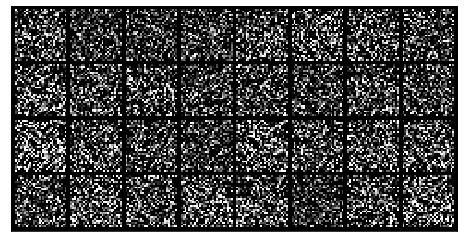

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:1,   G_loss:0.000729619525372982,   D_loss:-2.069881884381175e-05


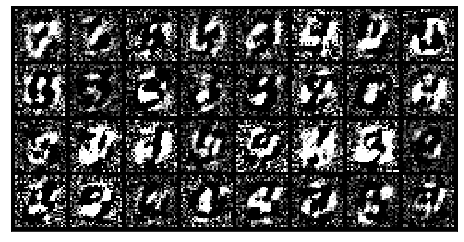

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:2,   G_loss:0.0006299762171693146,   D_loss:-5.68630057387054e-05


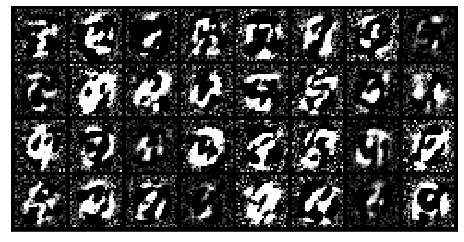

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:3,   G_loss:0.0005242925835773349,   D_loss:-1.2512318789958954e-05


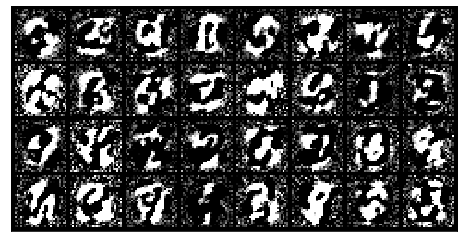

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:4,   G_loss:0.0003353977226652205,   D_loss:-7.610855391249061e-06


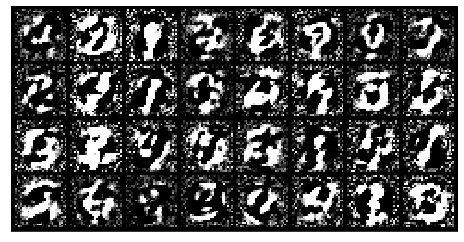

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:5,   G_loss:0.000382199912564829,   D_loss:-4.7197681851685047e-07


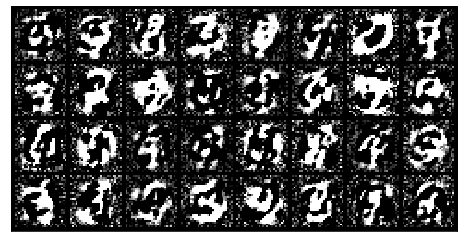

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:6,   G_loss:0.0005631846142932773,   D_loss:-1.4526944141834974e-05


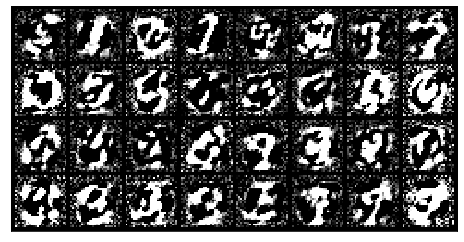

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:7,   G_loss:0.0004740342847071588,   D_loss:-3.418419510126114e-06


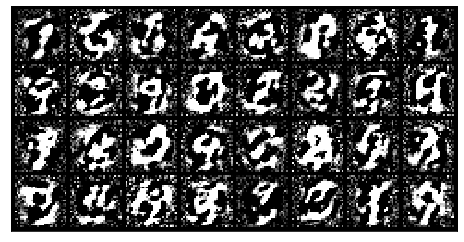

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:8,   G_loss:0.0006183484219945967,   D_loss:5.820766091346741e-11


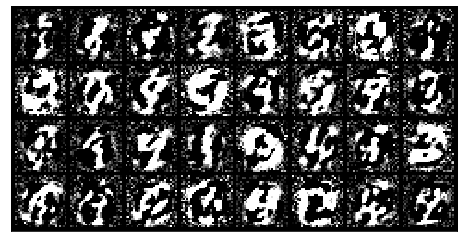

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:9,   G_loss:0.0005027946317568421,   D_loss:0.0


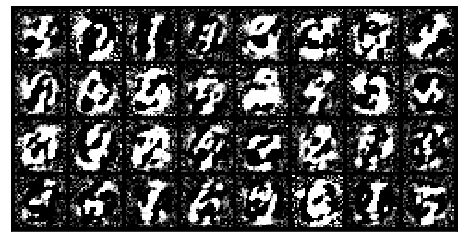

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:10,   G_loss:0.0004912710282951593,   D_loss:0.0


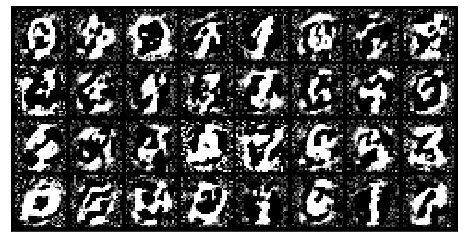

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:11,   G_loss:0.00045802537351846695,   D_loss:-2.9103830456733704e-11


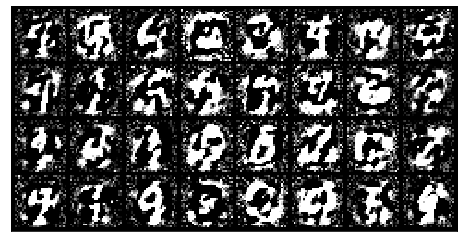

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:12,   G_loss:0.0005304513033479452,   D_loss:0.0


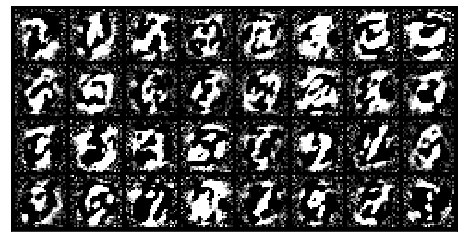

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:13,   G_loss:0.00046419556019827724,   D_loss:0.0


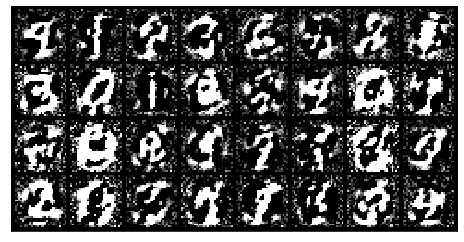

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:14,   G_loss:0.00044244760647416115,   D_loss:-2.9103830456733704e-11


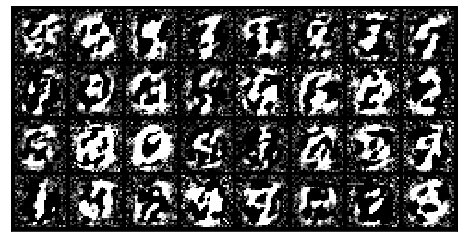

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:15,   G_loss:0.0003626650432124734,   D_loss:-5.820766091346741e-11


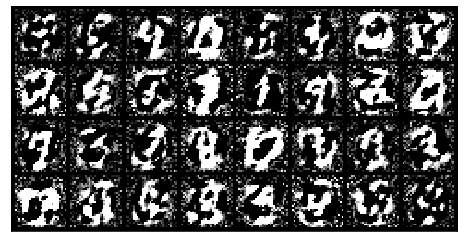

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:16,   G_loss:0.000375645759049803,   D_loss:0.0


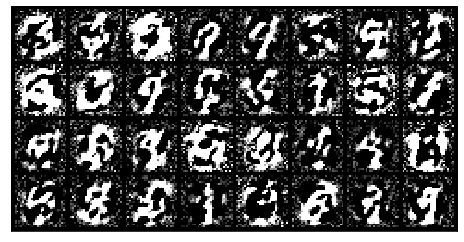

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:17,   G_loss:0.0002250133256893605,   D_loss:-1.4551915228366852e-11


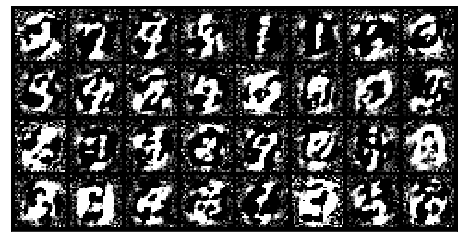

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:18,   G_loss:0.00026097518275491893,   D_loss:2.9103830456733704e-11


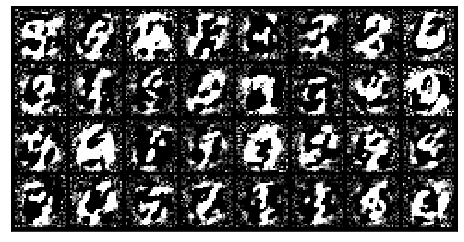

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:19,   G_loss:0.00037487896042875946,   D_loss:2.9103830456733704e-11


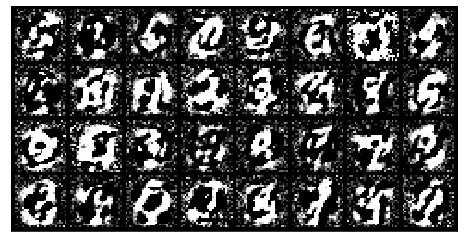

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:20,   G_loss:0.00033776546479202807,   D_loss:-2.9103830456733704e-11


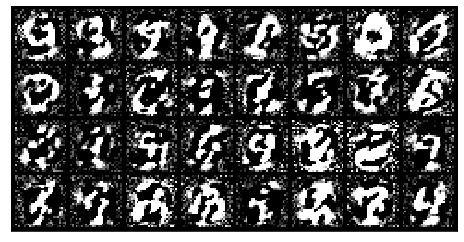

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:21,   G_loss:0.0003802557766903192,   D_loss:0.0


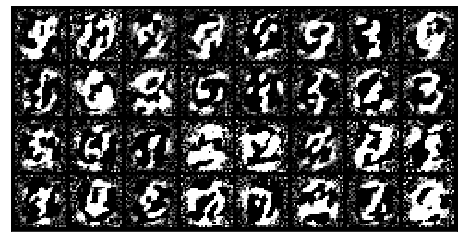

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:22,   G_loss:0.0003756894438993186,   D_loss:2.9103830456733704e-11


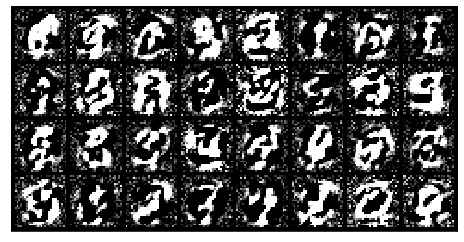

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:23,   G_loss:0.0003097951994277537,   D_loss:2.9103830456733704e-11


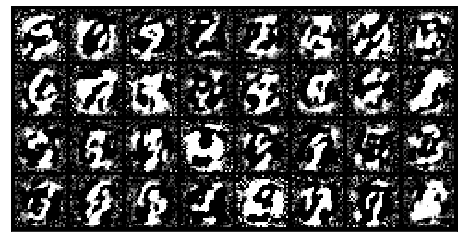

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:24,   G_loss:0.00027334270998835564,   D_loss:5.820766091346741e-11


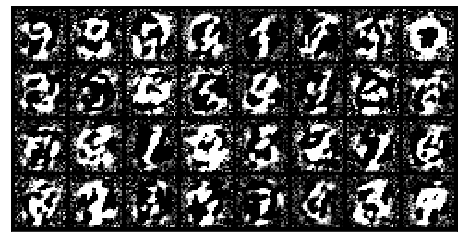

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:25,   G_loss:0.00022611313033849,   D_loss:1.4551915228366852e-11


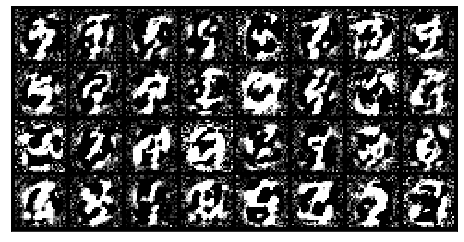

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:26,   G_loss:0.0002845710841938853,   D_loss:-2.9103830456733704e-11


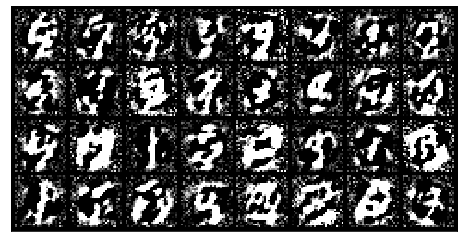

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:27,   G_loss:0.00031594402389600873,   D_loss:5.820766091346741e-11


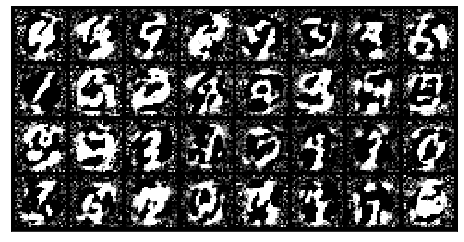

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:28,   G_loss:0.00032468861900269985,   D_loss:-2.9103830456733704e-11


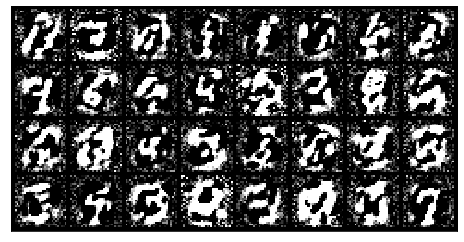

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:29,   G_loss:0.00035478948848322034,   D_loss:5.820766091346741e-11


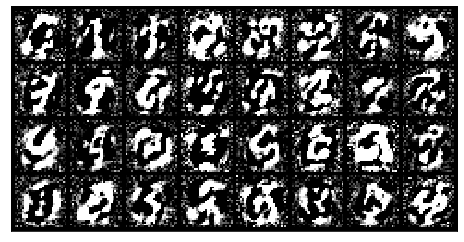

In [15]:
for epoch in range(30):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i,data in enumerate(trainloader):
        
        X, y = data
        #print(X.size())
        X = X.view(X.size(0), -1)
        X = X.to(DEVICE)
        #print(X.size())
        mb_size = X.size(0)
        #print(mb_size)
        #D(X)
        
        
        # Defining the loss for Discriminator
        z = torch.randn(mb_size, Z_dim)
        z = z.to(DEVICE)
        #print(D(X).shape)
        X_loss = torch.mean(D(X))
        z_loss = torch.mean(D(G(z)))
        D_loss = z_loss - X_loss
        
        # backward propagation for discriminator
        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()
        for p in D.parameters():
            p.data.clamp_(-0.01, 0.01)
        
        # Feed forward for generator
        z = torch.randn(mb_size, Z_dim)
        z = z.to(DEVICE)
        
        # loss function of generator
        G_loss = -torch.mean(D(G(z)))
        
        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()
        
        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())
        
        G_loss_run = G_loss.item()
        D_loss_run = D_loss.item()
        
    # printing loss after each epoch 
    print('Epoch:{},   G_loss:{},   D_loss:{}'.format(epoch, G_loss_run, D_loss_run ))
    
    # Plotting fake images generated after each epoch by generator
    #print(G(z,y).shape)
    samples = G(z).detach()
    samples = samples.cpu()
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)
    
    


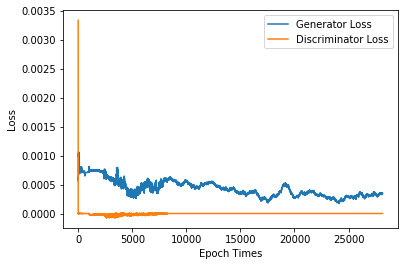

In [17]:
plt.plot(G_losses,label='Generator Loss')
plt.plot(D_losses,label='Discriminator Loss')
plt.legend()
plt.xlabel('Epoch Times')
plt.ylabel('Loss')
plt.show()